In [44]:
########################################
# importing packages
########################################
import pandas            as pd                          # data science essentials
import matplotlib.pyplot as plt                         # fundamental data visualization
import seaborn           as sns                         # enhanced visualizations
from sklearn.preprocessing import StandardScaler        # standard scaler
from sklearn.decomposition import PCA                   # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering

In [45]:
########################################
# loading data and setting display options
########################################
# loading data
my_df = pd.read_excel('Survey_Data_Final_Exam.xlsx')


# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

In [46]:
# Changing the names of columns

#Change the column names 
my_df.columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 
              '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', 
              '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', 
              '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', 
              '41', '42', '43', '44', '45', '46', '47', '48', '49', '50',
              'DNA_1', 'DNA_2', 'DNA_3', 'DNA_4', 'DNA_5', 'DNA_6', 'DNA_7',
              'DNA_8', 'DNA_9', 'DNA_10', 'DNA_11', 'DNA_12', 'DNA_13', 
              'DNA_14', 'DNA_15', 'DNA_16', 'DNA_17', 'DNA_18', 'DNA_19', 
              'DNA_20', 'DNA_21',
              'Current laptop',
              'Next laptop',
              'Program',
              'Age',
              'Gender',
              'Nationality', 
              'Ethnicity']

In [47]:
# Changing demographic data

placeholder_lst = []

for age in my_df['Age']:
    
    if age <= 20:
        age_range = '<20'
    
    elif age > 20 and age <= 25:
        age_range = '20-25'
    
    elif age > 25 and age <= 30:
        age_range = '26-30'
        
    elif age > 30 and age <= 35:
        age_range = '31-35'
    
    elif age > 36 and age <= 40:
        age_range = '36-40'
        
    elif age > 40:
        age_range = '>40'
        
    placeholder_lst.append(age_range)
    
my_df['age_range'] = placeholder_lst

In [48]:
# create a placeholder list
placeholder_lst = []

# create a list for nationality change
nation_change = [[['china'],'chinese'],
                 [['peru'], 'peruvian'],
                 [['mexico'], 'mexican'],
                 [['usa'], 'american'],
                 [['russia'], 'russian'],
                 [['ecuador'], 'ecuadorian'],
                 [['brazil'], 'brazilian'],
                 [['nigeria'], 'nigerian'],
                 [['korea','republicofkorea','southkorea'],'korean'],
                 [['spain'],'spanish'],
                 [['indonesia'],'indonesian'],
                 [['germany'],'german'],
                 [['colombia'], 'colombian'],
                 [['taiwan', 'taiwan(roc)'], 'taiwanese'],
                 [['japan'], 'japanese'],
                 [['canada'], 'canadian'],
                 [['philippines'], 'filipino'],
                 [['thailand'], 'thai'],
                 [['india'], 'indian'],
                 [['czechrepublic'], 'czech'],
                 [['belgium'], 'belgian'],
                 [['english'], 'british'],
                 [['ghana'], 'ghanaian'],
                 [['.', 'hispanic'], 'prefernottoanswer'],
                 [['italianandspanish', 'german/american', 'french/brazilian', 'british,indian', 'caribbean-american'], 'multi-ethnic'],
                 [['costarica'], 'costarrican'],
                 [['congolese(drcongo)'], 'congolese'],
                 [['venezuela'],'venezuelan'],
                 [['dominicanrepublic'],'dominican']
                
                ]

# create a for loop
for nationality in my_df['Nationality']:
    
    # remove " " and "."
    nationality = nationality.lower().replace(" ","").replace(".","")
    
    # create a loop
    for old_nat, new_nat in nation_change:
    
        # create if statement to check if nationality is wrong
        if nationality in old_nat:
            nationality = new_nat
    
    # append the correct nationality to a list
    placeholder_lst.append(nationality)

# create a new column
my_df['Nationality2'] = placeholder_lst

In [49]:
# create a placeholder list
placeholder_lst = []

# create a for loop
for nationality in my_df['Nationality2']:
    
    # check if nationality is in Asia
    if nationality in ['indian','chinese','taiwanese','filipino','korean',
                       'thai','indonesian','vietnamese','japanese','palestinian',
                       'kyrgyz','pakistani','bangladeshi','iran','malaysia']:
        nationality = 'Asian'
    
    # check if nationality is in Europe
    elif nationality in ['german','russian','italian','spanish','norwegian',
                         'turkish','belgian','czech','british','swiss',
                         'ukrainian','portuguese','belarus','dutch','poland',
                         'armenia','dutch']:
        nationality = 'European'
    
    # check if nationality is in North America
    elif nationality in ['mexican','american','canadian','dominican','costarrican',
                         'panama','guatemalan','elsalvador','honduran']:
        nationality = 'North American'
    
    # check if nationality is in South America
    elif nationality in ['peruvian','colombian','brazilian','ecuadorian',
                         'venezuelan']:
        nationality = 'South American'
    
    # check if nationality is in Africa
    elif nationality in ['nigerian','kenyan','congolese','ghanaian','ugandan',
                         'mauritius','southafrican','cameroon']:
        nationality = 'Africa'
    
    # check if nationality is multi-ethnic
    elif nationality == 'multi-ethnic':
        nationality = 'multi-ethnic'
    
    # put 'prefernottoanswer' for the remaining
    else: 
        nationality = 'prefernottoanswer'
    
    # append the new nationality group to a list
    placeholder_lst.append(nationality)

# create a new column
my_df['Nationality_continent'] = placeholder_lst

In [50]:
# ########################################
# # Standardize the columns for negative question 
# ########################################
# # DNA_2 to DNA_2n

# placeholder_lst = []

# for value in my_df['DNA_2']:
    
#     if value == 1:
#         DNA_2n = 5
    
#     elif value == 2:
#         DNA_2n = 4
    
#     elif value == 3:
#         DNA_2n = 3
        
#     elif value == 4:
#         DNA_2n = 2
    
#     elif value == 5:
#         DNA_2n = 1
        
#     placeholder_lst.append(DNA_2n)
    
# my_df['DNA_2n'] = placeholder_lst

# # DNA_12 to DNA_12_n

# placeholder_lst = []

# for value in my_df['DNA_12']:
    
#     if value == 1:
#         DNA_12n = 5
    
#     elif value == 2:
#         DNA_12n = 4
    
#     elif value == 3:
#         DNA_12n = 3
        
#     elif value == 4:
#         DNA_12n = 2
    
#     elif value == 5:
#         DNA_12n = 1
        
#     placeholder_lst.append(DNA_12n)
    
# my_df['DNA_12n'] = placeholder_lst

# # DNA_16 to DNA_16n

# placeholder_lst = []

# for value in my_df['DNA_16']:
    
#     if value == 1:
#         DNA_16n = 5
    
#     elif value == 2:
#         DNA_16n = 4
    
#     elif value == 3:
#         DNA_16n = 3
        
#     elif value == 4:
#         DNA_16n = 2
    
#     elif value == 5:
#         DNA_16n = 1
        
#     placeholder_lst.append(DNA_16n)
    
# my_df['DNA_16n'] = placeholder_lst

In [51]:
# # Drop the columns
# my_df = my_df.drop('DNA_2', axis = 1)
# my_df = my_df.drop('DNA_12', axis = 1)
# my_df = my_df.drop('DNA_16', axis = 1)

In [52]:
# ########################################
# # Group
# ########################################

# # Growth/Fixed mindset, ['DNA_4']
# # ['growth_mindset'], ['fixed_mindset']
# placeholder_lst = []
# for value in my_df['DNA_4']:
#     if value >3 :
#         placeholder_lst.append(1)
    
#     else:
#          placeholder_lst.append(0)
    
# my_df['Growth mindset'] = placeholder_lst

# # saving new columns
# new_columns = my_df.columns

In [53]:
# ########################################
# # Positive thinking, ['DNA_3']['DNA_19'],['DNA_5']=['DNA_8']
# # ['need_improve_thiking'],['positive_thinking']
# my_df['thinking'] = my_df[['DNA_3', 'DNA_19','DNA_5','DNA_8']].mean(axis=1)
# placeholder_lst = []
# for value in my_df['thinking']:
#     if value > 4.25 :
#          placeholder_lst.append(1)
    
#     else:
#          placeholder_lst.append(0)
        
    
# my_df['high_thinking'] = placeholder_lst


# # saving new columns
# new_columns = my_df.columns

In [54]:
# ########################################
# # Communicator/ Need_improve_communication, ['DNA_11'],['DNA_6']=['DNA_9']
# # ['DNA_2n'], ['DNA_12n'],['DNA_17']
# my_df['CMT'] = my_df[['DNA_11', 'DNA_6','DNA_9','DNA_2n','DNA_12n','DNA_17']].mean(axis=1)

# # my_df['CMT'] has the mean 3.75
# placeholder_lst = []
# for value in my_df['CMT']:
#     if value > 3.75 :
#         placeholder_lst.append(1)
    
#     else:
#         placeholder_lst.append(0)
        
    
# my_df['high_communicating'] = placeholder_lst

# new_columns = my_df.columns

In [55]:
# ########################################
# # Team player/ Independent, ['DNA_13'],['DNA_14'], ['DNA_16n'], 
# # ['DNA_7']=['DNA_10'], ['DNA_19'],['DNA_20'],['DNA_21'],
# # ['DNA_1'],['DNA_15'],['DNA_18']

# my_df['team'] = my_df[['DNA_13', 'DNA_14','DNA_16n','DNA_7','DNA_10','DNA_19',
#                       'DNA_20','DNA_21','DNA_1','DNA_15','DNA_18']].mean(axis=1)

# # my_df['team'] has the mean 3.98
# placeholder_lst = []
# for value in my_df['team']:
#     if value >= 4 :
#         placeholder_lst.append(1)
    
#     else:
#         placeholder_lst.append(0)
        
    
# my_df['high_teamwork'] = placeholder_lst

# # saving new columns
# new_columns = my_df.columns

In [56]:
# # drop the columns

# my_df = my_df.drop('Current laptop', axis = 1)
# my_df = my_df.drop('Next laptop', axis = 1)
# my_df = my_df.drop('Program', axis = 1)
# my_df = my_df.drop('Age', axis = 1)
# my_df = my_df.drop('Gender', axis = 1)
# my_df = my_df.drop('Nationality', axis = 1)
# my_df = my_df.drop('Ethnicity', axis = 1)




In [57]:
my_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,DNA_1,DNA_2,DNA_3,DNA_4,DNA_5,DNA_6,DNA_7,DNA_8,DNA_9,DNA_10,DNA_11,DNA_12,DNA_13,DNA_14,DNA_15,DNA_16,DNA_17,DNA_18,DNA_19,DNA_20,DNA_21,Current laptop,Next laptop,Program,Age,Gender,Nationality,Ethnicity,age_range,Nationality2,Nationality_continent
0,a1000,4,3,4,3,4,2,3,2,3,2,2,1,5,4,4,4,4,2,2,3,4,3,4,2,3,2,4,2,2,3,3,2,5,4,4,3,3,2,3,3,3,3,4,2,4,3,3,4,2,3,4,2,4,4,4,4,4,4,4,4,4,3,4,4,4,2,4,4,4,4,4,Macbook,Macbook,DD (MIB & Business Analytics),25,Female,ecuador,Hispanic / Latino,20-25,ecuadorian,South American
1,a1001,2,4,3,4,3,3,2,3,4,2,3,1,4,4,5,3,4,2,4,2,3,5,3,4,4,3,4,2,1,1,2,2,5,4,4,4,4,3,2,2,2,3,5,4,5,4,5,5,3,4,4,2,2,4,4,4,5,5,5,5,5,2,4,4,2,3,4,5,5,4,5,Windows laptop,Windows laptop,One year Business Analytics,27,Male,Ecuador,Hispanic / Latino,26-30,ecuadorian,South American
2,a1002,4,4,5,1,4,3,2,2,5,1,3,3,5,1,2,3,2,1,5,4,3,4,4,3,3,2,3,2,2,2,4,3,1,2,5,4,3,2,1,2,5,3,4,4,2,3,3,3,1,4,3,2,5,3,5,2,3,5,2,3,3,2,3,4,4,2,4,2,3,3,5,Windows laptop,Windows laptop,One year Business Analytics,25,Male,Indian,West Asian / Indian,20-25,indian,Asian
3,a1003,4,5,3,3,3,3,5,3,5,4,3,1,4,4,5,5,5,3,3,3,4,2,3,1,5,4,5,2,2,1,3,3,3,4,3,3,4,3,4,3,2,5,3,5,5,3,5,3,3,5,3,3,3,5,5,5,4,4,4,4,5,3,5,5,5,5,3,5,5,5,5,Windows laptop,Windows laptop,One year Business Analytics,26,Female,indian,West Asian / Indian,26-30,indian,Asian
4,a1004,5,4,4,4,3,3,3,3,3,3,3,3,3,4,5,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,3,3,4,4,4,4,4,3,3,3,3,4,4,3,3,3,5,3,3,3,3,3,3,4,4,4,3,3,4,4,3,3,3,3,3,Macbook,Windows laptop,DD (MBA & Disruptive innovation),27,Male,China,Far east Asian,26-30,chinese,Asian


In [58]:
# dropping demographic information
my_df_DNA = my_df.loc[:, 'DNA_1':'DNA_21']

# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(my_df_DNA)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(my_df_DNA)


# converting scaled data into a DataFrame
DNA_scaled = pd.DataFrame(X_scaled)


# reattaching column names
DNA_scaled.columns = my_df_DNA.columns


# checking pre- and post-scaling variance
print(pd.np.var(my_df_DNA), '\n\n')
print(pd.np.var(DNA_scaled))
                             

DNA_1     0.671908
DNA_2     1.102763
DNA_3     0.604585
DNA_4     0.596939
DNA_5     0.648161
DNA_6     0.818142
DNA_7     0.652124
DNA_8     0.522432
DNA_9     0.771131
DNA_10    0.627447
DNA_11    0.659250
DNA_12    1.059350
DNA_13    0.574910
DNA_14    0.464123
DNA_15    0.588687
DNA_16    1.209125
DNA_17    0.620028
DNA_18    0.524619
DNA_19    0.641966
DNA_20    0.767694
DNA_21    0.556747
dtype: float64 


DNA_1     1.0
DNA_2     1.0
DNA_3     1.0
DNA_4     1.0
DNA_5     1.0
DNA_6     1.0
DNA_7     1.0
DNA_8     1.0
DNA_9     1.0
DNA_10    1.0
DNA_11    1.0
DNA_12    1.0
DNA_13    1.0
DNA_14    1.0
DNA_15    1.0
DNA_16    1.0
DNA_17    1.0
DNA_18    1.0
DNA_19    1.0
DNA_20    1.0
DNA_21    1.0
dtype: float64


/Users/Piya/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Piya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  del sys.path[0]


In [59]:
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

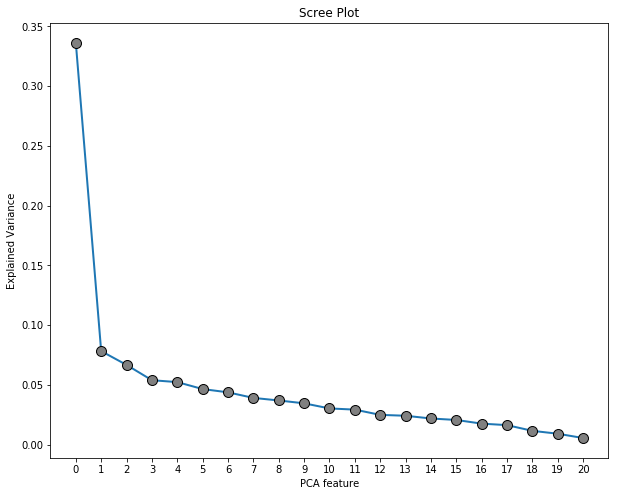

In [60]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
          random_state = 802)


# FITTING and TRANSFORMING the purchases_scaled
customer_pca = pca.fit_transform(DNA_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca)

In [61]:
# INSTANTIATING a new model using the first three principal components
pca_3 = PCA(n_components = 2,
            random_state = 802)


# FITTING and TRANSFORMING the purchases_scaled
customer_pca_3 = pca_3.fit_transform(DNA_scaled)

In [62]:
####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(pd.np.transpose(pca.components_))


# naming rows as original features
factor_loadings = factor_loadings.set_index(DNA_scaled.columns)


##################
### 3 PC Model ###
##################
# transposing pca components (pc = 3)
factor_loadings_3 = pd.DataFrame(pd.np.transpose(pca_3.components_))


# naming rows as original features
factor_loadings_3 = factor_loadings_3.set_index(DNA_scaled.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings.round(2)}


2 Components Factor Loadings
------------------------------
{factor_loadings_3.round(2)}
""")


MAX Components Factor Loadings
------------------------------
          0     1     2     3     4     5     6     7     8     9     10    11    12    13    14    15    16    17    18    19    20
DNA_1  -0.20 -0.13 -0.08  0.13  0.01  0.01 -0.47 -0.41 -0.43  0.11  0.25 -0.03  0.22  0.39  0.04  0.15  0.15  0.01  0.13  0.02  0.07
DNA_2   0.08  0.06  0.45 -0.53 -0.30 -0.13  0.10  0.25 -0.09  0.04  0.19 -0.21  0.27  0.29  0.24  0.02 -0.08  0.11  0.04  0.01  0.04
DNA_3  -0.21 -0.00  0.13 -0.08 -0.26  0.34  0.05  0.03 -0.42 -0.14 -0.41 -0.24 -0.49  0.16 -0.20 -0.04  0.01  0.03  0.01  0.13 -0.02
DNA_4  -0.23 -0.03 -0.10  0.12  0.17  0.40  0.33  0.14 -0.15 -0.16 -0.21  0.20  0.49  0.24  0.19 -0.01 -0.14 -0.05 -0.30 -0.14  0.04
DNA_5  -0.25 -0.22  0.07 -0.04 -0.32  0.35  0.10 -0.13  0.20 -0.19  0.24  0.11  0.04 -0.16  0.08 -0.17  0.10 -0.21  0.48 -0.27 -0.26
DNA_6  -0.26 -0.26  0.22  0.14 -0.00 -0.33 -0.06  0.12  0.03 -0.19 -0.31  0.15  0.03 -0.09  0.00  0.12 -0.08  0.11  0.31 -0.21  0.57
DNA_7 

In [64]:
# Defining Components
# 0	Cold_Realist OR MIXED
# 1	Calm_Outsider
# 2	Calm_Insider
# 3	Polite_Realist
# 4	Polite_Dreamer


# naming each principal component
factor_loadings_3.columns = ['Balanced',
                             'Team_player']


# checking the result
factor_loadings_3

,Balanced,Team_player
DNA_1,-0.200906,-0.128837
DNA_2,0.080267,0.059266
DNA_3,-0.214944,-0.002692
DNA_4,-0.227228,-0.033619
DNA_5,-0.247252,-0.218732
DNA_6,-0.261696,-0.263740
DNA_7,-0.256175,-0.205202
DNA_8,-0.275576,-0.185017
DNA_9,-0.258791,-0.300070
DNA_10,-0.252322,-0.185222


In [65]:
# analyzing factor strengths per customer
X_pca_reduced = pca_3.transform(DNA_scaled)


# converting to a DataFrame
X_pca_df = pd.DataFrame(X_pca_reduced)


# checking the results
X_pca_df

,0,1
0,0.002541,-0.289953
1,-1.186671,-0.570029
2,2.777220,-1.030334
3,-2.112491,2.126098
4,4.199188,0.018369
5,2.849020,0.436069
6,-1.010152,1.033089
7,-3.841919,0.433243
8,-0.345077,-0.339104
9,0.739439,0.456215


In [25]:
pd.np.var(X_pca_df)

0    7.062184
1    1.643652
2    1.401190
dtype: float64

In [66]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(X_pca_df)


# TRANSFORMING our data after fit
X_scaled_pca = scaler.transform(X_pca_df)


# converting scaled data into a DataFrame
pca_scaled = pd.DataFrame(X_scaled_pca)


# reattaching column names
pca_scaled.columns = ['Balanced',
                      'Team_player']


# checking pre- and post-scaling variance
print(pd.np.var(X_pca_df), '\n\n')
print(pd.np.var(pca_scaled))

0    7.062184
1    1.643652
dtype: float64 


Balanced       1.0
Team_player    1.0
dtype: float64


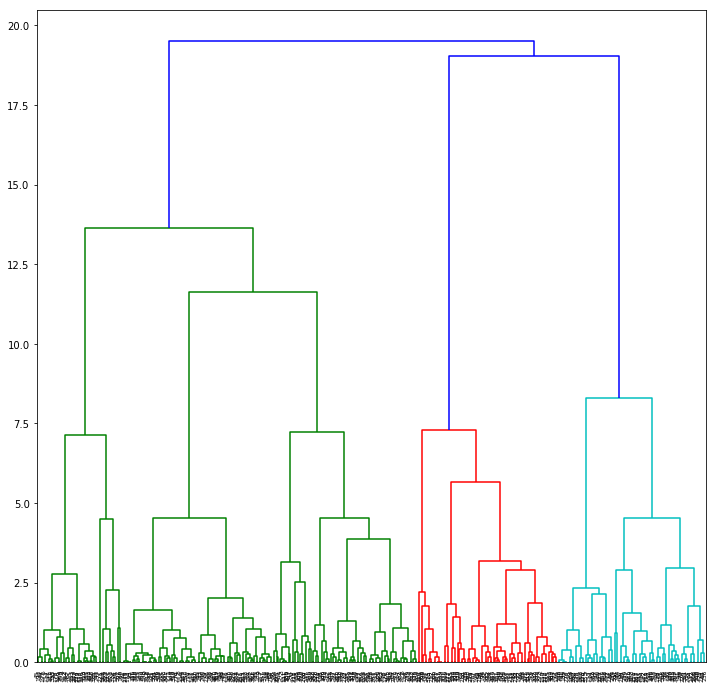

In [67]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_scaled,
                                 method = 'ward')


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# saving and displaying the plot
plt.savefig('standard_hierarchical_clust_ward.png')
plt.show()

In [68]:
########################################
# inertia
########################################
def interia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()


########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

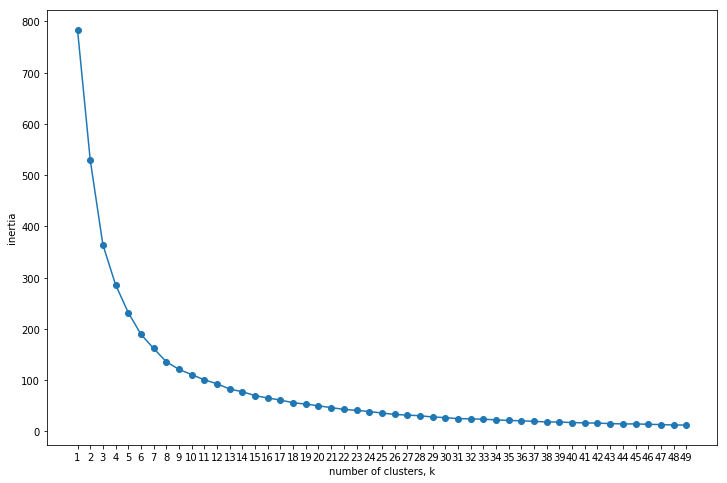

In [69]:
# calling the inertia_plot() function
interia_plot(data = pca_scaled)

In [70]:
# INSTANTIATING a k-Means object with three clusters
customers_k_pca = KMeans(n_clusters = 3,
                         random_state = 802)


# fitting the object to the data
customers_k_pca.fit(pca_scaled)


# converting the clusters to a DataFrame
customers_kmeans_pca = pd.DataFrame({'Cluster': customers_k_pca.labels_})


# checking the results
print(customers_kmeans_pca.iloc[: , 0].value_counts())

0    169
1    115
2    108
Name: Cluster, dtype: int64


In [73]:
# 0	Cold_Realist OR MIXED
# 1	Calm_Outsider
# 2	Calm_Insider

# storing cluster centers
centroids_pca = customers_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = ['Balanced',
                            'Team_player']


# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,Balanced,Team_player
0,-0.72,-0.43
1,0.09,1.15
2,1.03,-0.56


In [74]:
# Changing Mac to Macbook
my_df['Current laptop'] =  my_df['Current laptop'].replace('MAC', 'Macbook')
my_df['Next laptop'] =  my_df['Next laptop'].replace('MAC', 'Macbook')

In [75]:
# concatenating cluster memberships with principal components
clst_pca_df = pd.concat([customers_kmeans_pca,
                         X_pca_df],
                         axis = 1)


# checking results
clst_pca_df


# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([my_df.loc[ : , ['Current laptop', 'Next laptop', 'Program', 'Gender', 'age_range',
                                                'Nationality_continent', 'Ethnicity']],
                                clst_pca_df],
                                axis = 1)


# renaming columns
final_pca_clust_df.columns = ['Current laptop',
                              'Next laptop',
                              'Program',
                              'Gender',
                              'age_range',
                              'Nationality_continent',
                              'Ethnicity',
                              'Cluster',
                              'Balanced',
                              'Team_player']




In [76]:
# renaming clusters
cluster_names = {0 : 'Cluster 1',
                 1 : 'Cluster 2',
                 2 : 'Cluster 3'
                }


final_pca_clust_df['Cluster'].replace(cluster_names, inplace = True)


# adding a productivity step
data_df = final_pca_clust_df


In [78]:
data_df.head()

,Current laptop,Next laptop,Program,Gender,age_range,Nationality_continent,Ethnicity,Cluster,Balanced,Team_player
0,Macbook,Macbook,DD (MIB & Business Analytics),Female,20-25,South American,Hispanic / Latino,Cluster 1,0.002541,-0.289953
1,Windows laptop,Windows laptop,One year Business Analytics,Male,26-30,South American,Hispanic / Latino,Cluster 1,-1.186671,-0.570029
2,Windows laptop,Windows laptop,One year Business Analytics,Male,20-25,Asian,West Asian / Indian,Cluster 3,2.777220,-1.030334
3,Windows laptop,Windows laptop,One year Business Analytics,Female,26-30,Asian,West Asian / Indian,Cluster 2,-2.112491,2.126098
4,Macbook,Windows laptop,DD (MBA & Disruptive innovation),Male,26-30,Asian,Far east Asian,Cluster 3,4.199188,0.018369


In [ ]:
data_df[data_df['Current laptop']=='Macbook'][data_df['Cluster'] == 'Cluster 1']

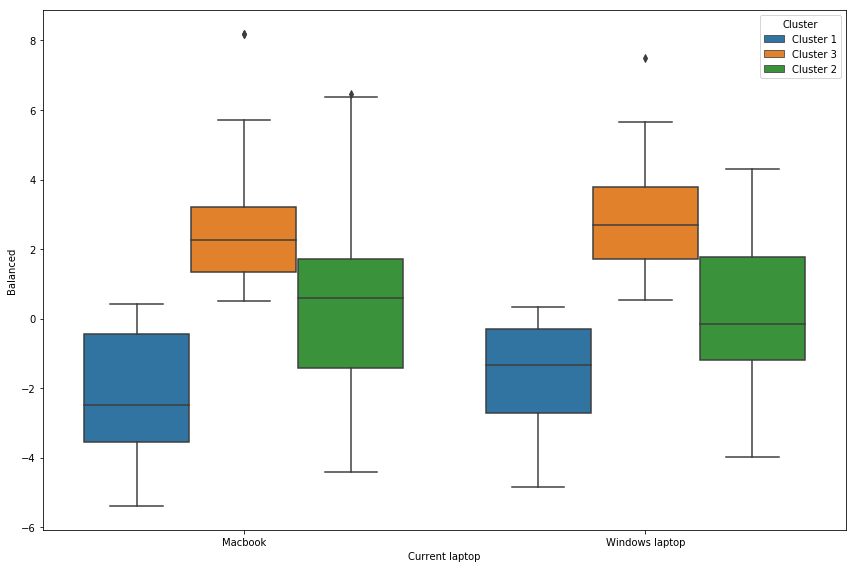

In [79]:
########################
# Current laptop
########################

# Balanced
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Current laptop',
            y = 'Balanced',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

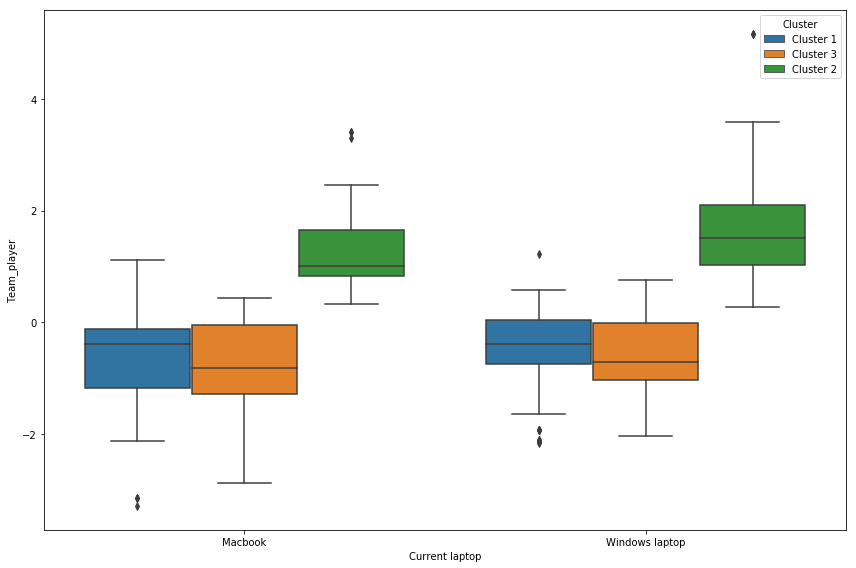

In [82]:
########################
# Current laptop
########################

# Balanced
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Current laptop',
            y = 'Team_player',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

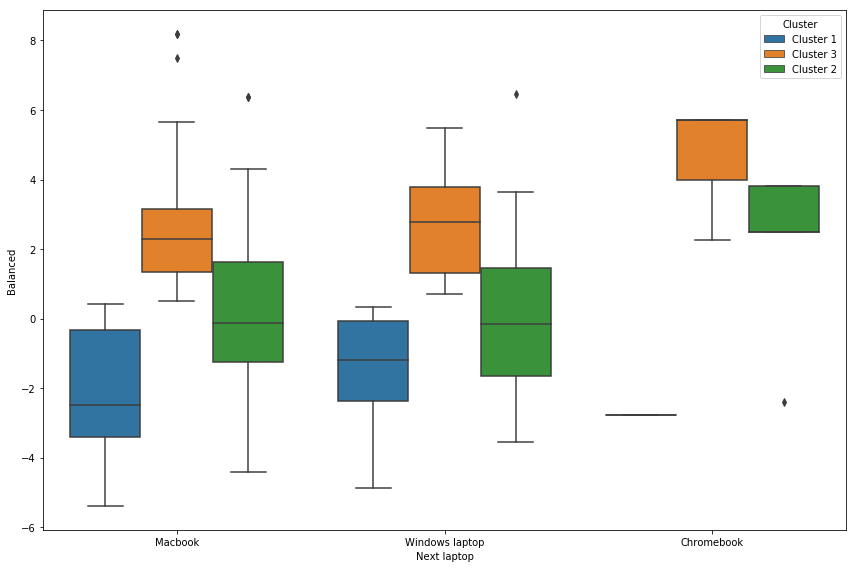

In [83]:
########################
# Next laptop
########################

# Balanced
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Next laptop',
            y = 'Balanced',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

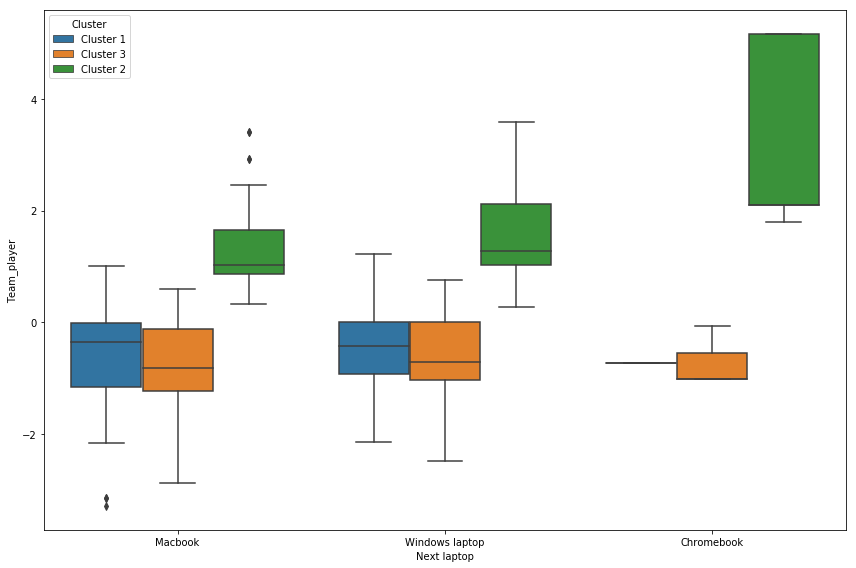

In [84]:
########################
# Next laptop
########################

# Balanced
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Next laptop',
            y = 'Team_player',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

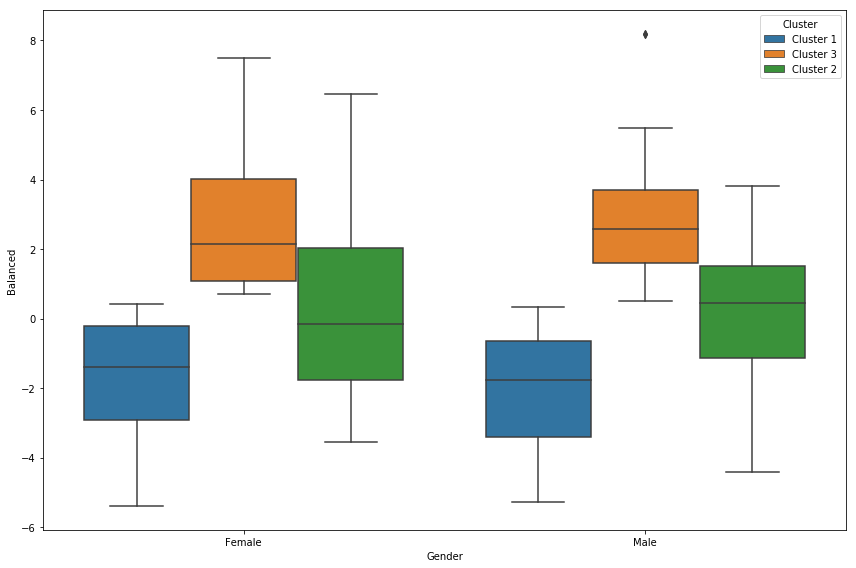

In [86]:
########################
# Gender
########################

# Balanced
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Gender',
            y = 'Balanced',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

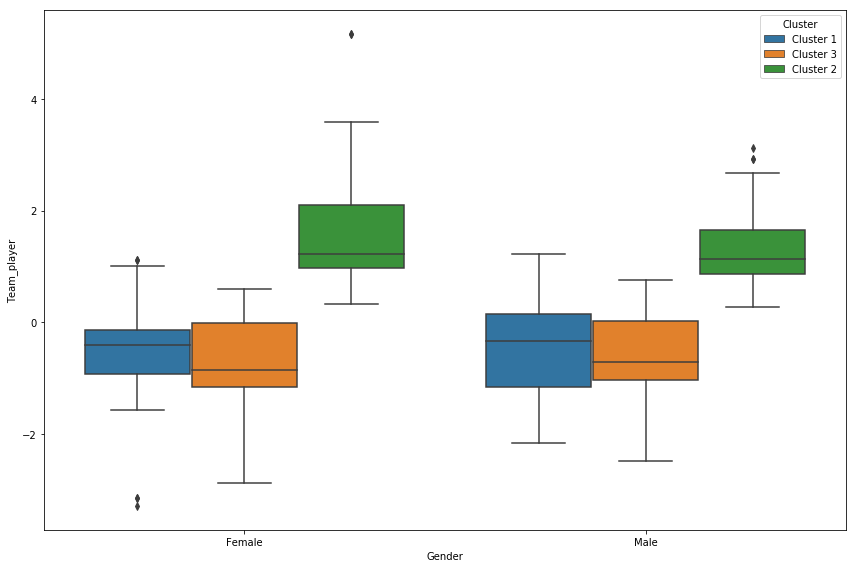

In [85]:
########################
# Gender
########################

# Balanced
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Gender',
            y = 'Team_player',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

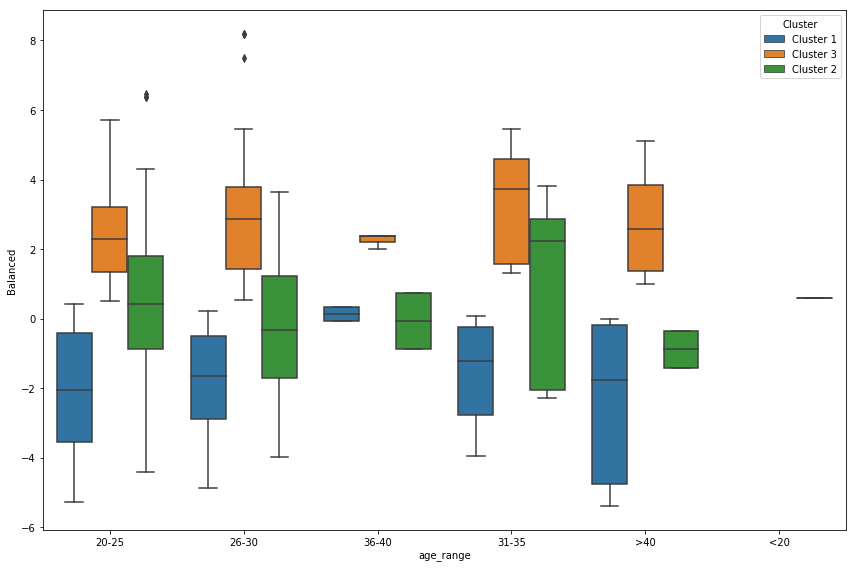

In [89]:
########################
# Age
########################

# Balanced
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'age_range',
            y = 'Balanced',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

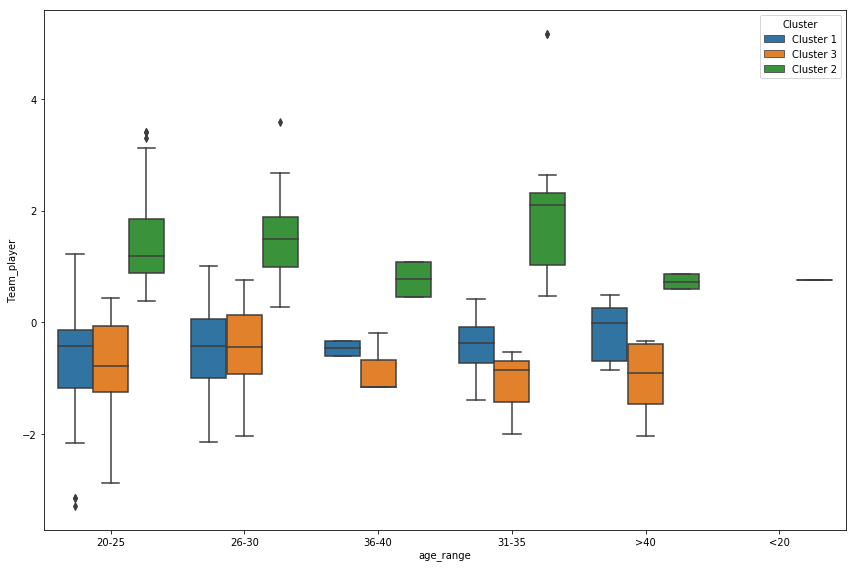

In [88]:
########################
# Age
########################

# Balanced
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'age_range',
            y = 'Team_player',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

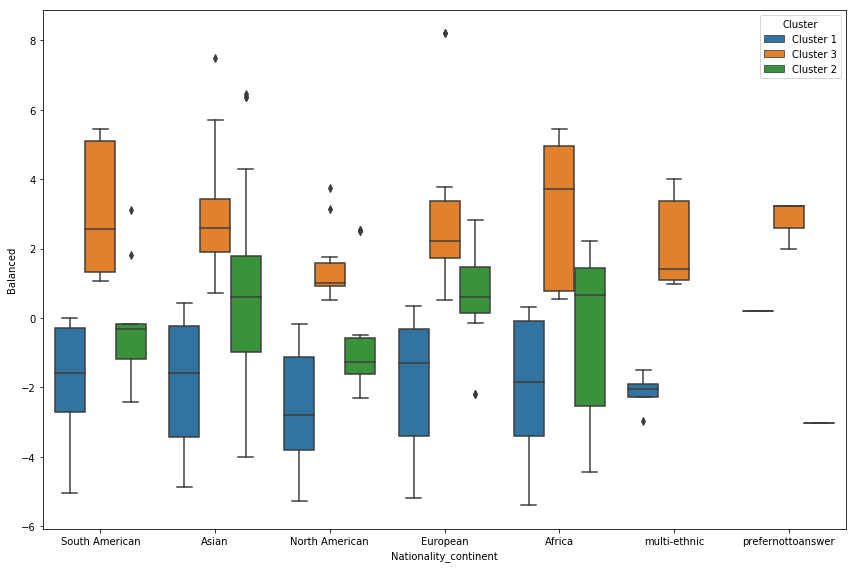

In [93]:
########################
# Nationality
########################

# Balanced
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Nationality_continent',
            y = 'Balanced',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

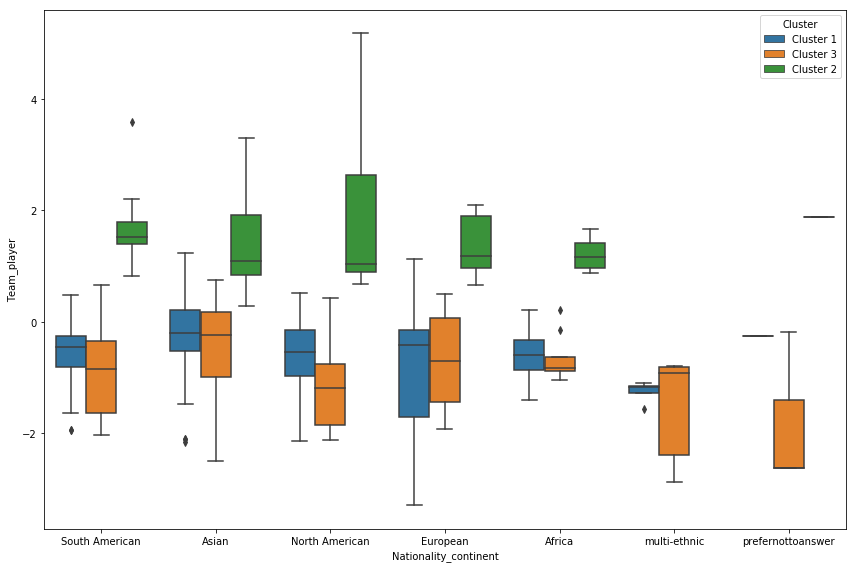

In [91]:
########################
# Nationality
########################

# Balanced
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Nationality_continent',
            y = 'Team_player',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()